# Player Analysis

In [383]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [384]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [385]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [386]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [387]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

## Taking in consideration only DC VS MI matches

In [388]:
DC_MI=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Mumbai Indians'))]
DC_MI = DC_MI[DC_MI["dl_applied"]==0]

DC_MI.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5512,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,1,0,0,0,1,1,NaN,NaN
5513,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,5,0,0,0,0,0,5,5,NaN,NaN
5514,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,1,0,1,NaN,NaN
5515,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,1,0,1,NaN,NaN
5516,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN


In [389]:
DC_MI.match_id.nunique()

24

In [390]:
DC_MI.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

## Wickets both the teams are expected to lost in Powerplay

In [391]:
overs = DC_MI[DC_MI["over"]<7]

In [392]:
overs.over.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

### Inning-wise

- 1st inning

In [393]:
first = overs[overs["inning"]==1]

In [394]:
first_innings = pd.DataFrame(first.groupby(["match_id","batting_team"])["player_dismissed"].count())

first_innings.columns =["first inning wickets"]

first_innings.reset_index(inplace = True)

print("1st inning wickets in powerplay overs :")


first_innings

1st inning wickets in powerplay overs :


,match_id,batting_team,first inning wickets
0,24,Mumbai Indians,2
1,44,Mumbai Indians,0
2,82,Mumbai Indians,2
3,109,Mumbai Indians,0
4,150,Mumbai Indians,3
5,170,Mumbai Indians,3
6,183,Mumbai Indians,1
7,221,Mumbai Indians,1
8,238,Delhi Capitals,3
9,282,Mumbai Indians,1


- Team-wise

In [395]:
team_wise = first_innings.groupby(["batting_team"]).agg({"batting_team":"count","first inning wickets":"sum"})

team_wise.columns = ["team count","wicket"]

print("Team wise wicket in first innings :")
team_wise

Team wise wicket in first innings :


,team count,wicket
batting_team,,
Delhi Capitals,7,11
Mumbai Indians,17,21


In [396]:
team_wise["per_match"] = round(team_wise["wicket"]/team_wise["team count"])

print("Per match wise wicket fall for both the teams in first inning :")
team_wise

Per match wise wicket fall for both the teams in first inning :


,team count,wicket,per_match
batting_team,,,
Delhi Capitals,7,11,2.0
Mumbai Indians,17,21,1.0


From here we can see that per match both the teams (while batting first) genreally MI looses 1 wicket and for DC count increases to 2 wickets.

In [397]:
(first_innings["first inning wickets"]>2).value_counts()

False    21
True      3
Name: first inning wickets, dtype: int64

In [398]:
first_innings.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,24.0,1857.333333,3598.353871,24.0,179.75,366.0,565.25,11325.0
first inning wickets,24.0,1.333333,1.049500,0.0,0.00,1.5,2.00,3.0


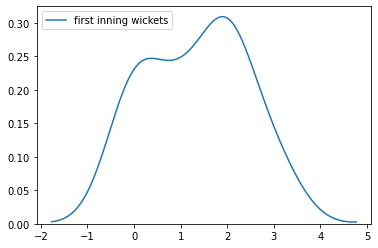

In [399]:
sns.kdeplot(first_innings["first inning wickets"])

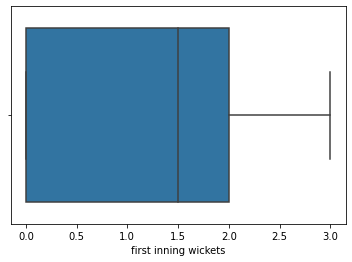

In [400]:
sns.boxplot(first_innings["first inning wickets"])

In [401]:
print("Average wicket fall in 1st innings of DC VS MI matches  :{}".format(round(first_innings["first inning wickets"].mean())))

Average wicket fall in 1st innings of DC VS MI matches  :1


- 2nd innings

In [402]:
second = overs[overs["inning"]==2]

In [403]:
second_innings = pd.DataFrame(second.groupby(["match_id","batting_team"])["player_dismissed"].count())

second_innings.columns =["second inning wickets"]

second_innings.reset_index(inplace = True)

print("2nd inning wickets in powerplay overs :")

second_innings

2nd inning wickets in powerplay overs :


,match_id,batting_team,second inning wickets
0,24,Delhi Capitals,5
1,44,Delhi Capitals,5
2,82,Delhi Capitals,2
3,109,Delhi Capitals,2
4,150,Delhi Capitals,0
5,170,Delhi Capitals,1
6,183,Delhi Capitals,1
7,221,Delhi Capitals,1
8,238,Mumbai Indians,1
9,282,Delhi Capitals,4


- Team-wise

In [404]:
team_wise = second_innings.groupby(["batting_team"]).agg({"batting_team":"count","second inning wickets":"sum"})

team_wise.columns = ["team count","wicket"]

print("Team wise wicket in second innings :")
team_wise

Team wise wicket in second innings :


,team count,wicket
batting_team,,
Delhi Capitals,17,28
Mumbai Indians,7,15


In [405]:
team_wise["per_match"] = round(team_wise["wicket"]/team_wise["team count"])

print("Per match wise wicket fall for both the teams in second inning :")
team_wise

Per match wise wicket fall for both the teams in second inning :


,team count,wicket,per_match
batting_team,,,
Delhi Capitals,17,28,2.0
Mumbai Indians,7,15,2.0


In [406]:
(second_innings["second inning wickets"]>2).value_counts()

False    18
True      6
Name: second inning wickets, dtype: int64

In [407]:
second_innings.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,24.0,1857.333333,3598.353871,24.0,179.75,366.0,565.25,11325.0
second inning wickets,24.0,1.791667,1.503016,0.0,1.00,1.0,2.25,5.0


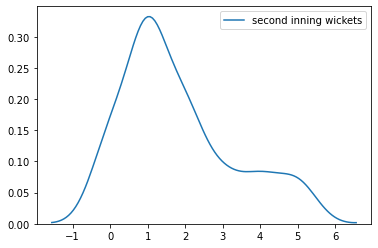

In [408]:
sns.kdeplot(second_innings["second inning wickets"])

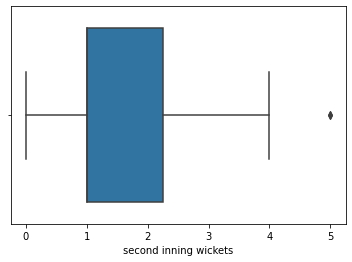

In [409]:
sns.boxplot(second_innings["second inning wickets"])

In [410]:
print("Average wicket fall in 2nd innings of DC VS MI matches  :{}".format(round(second_innings["second inning wickets"].mean())))

Average wicket fall in 2nd innings of DC VS MI matches  :2


- Overall

In [411]:
wickets = pd.DataFrame(overs.groupby(['match_id'])["player_dismissed"].count())

wickets.columns = ["wickets"]

print("Wicket fall in powerplay :")

wickets

Wicket fall in powerplay :


,wickets
match_id,
24,7
44,5
82,4
109,2
150,3
170,4
183,2
221,2
238,4


In [412]:
wickets.describe().T

,count,mean,std,min,25%,50%,75%,max
wickets,24.0,3.125,1.676241,0.0,2.0,3.0,4.0,7.0


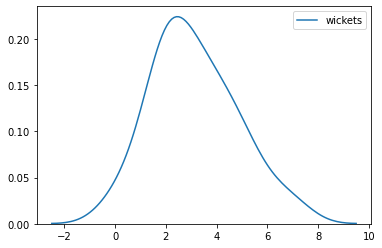

In [413]:
sns.kdeplot(wickets['wickets'])

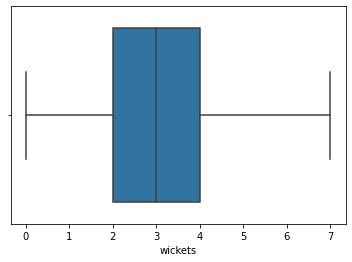

In [414]:
sns.boxplot(wickets['wickets'])

In [415]:
print("Average wicket fall in MI VS DC matches  :{}".format(round(wickets["wickets"].mean())))

Average wicket fall in MI VS DC matches  :3


Text(0.5, 1.0, 'Wicket fall in 1st innings')

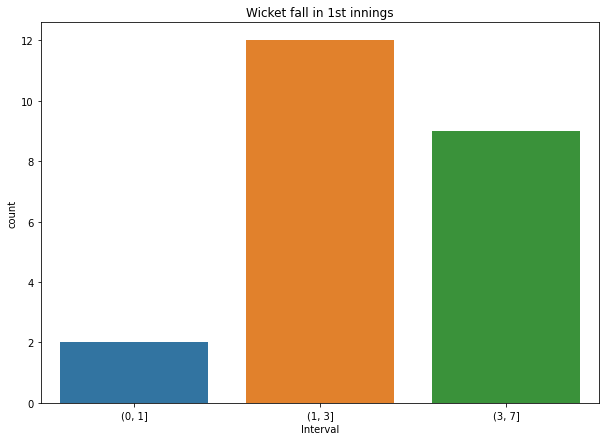

In [416]:
plt.figure(figsize=(10,7))
wickets["Interval"] = pd.cut(wickets["wickets"],[0,1,3,7])
sns.countplot(wickets["Interval"])
plt.title("Wicket fall in 1st innings")

From all the above analysis inning wise and overall we saw that if DC bats in first inning then they lost campartively more wickets then MI and there is a equal wicket fall scenerio in 2nd innings.

So from all the above analysis of inning-wise and overall we can predict that 2-3 wickets are expected to fall in powerplay in the match.

## Bowlers with economy rate less then 9

- Mumbai Indians

In [417]:
mi = DC_MI[DC_MI["bowling_team"]=="Mumbai Indians"]
mi = mi[(mi["season"]==2016)|(mi["season"]==2017)|(mi["season"]==2018)|(mi["season"]==2019)]
mi = mi[(mi["bye_runs"]==0) & (mi["legbye_runs"]==0)]
mi.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5639,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,1,1,SV Samson,...,0,0,0,0,0,0,0,0,NaN,NaN
5640,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,1,2,SV Samson,...,0,0,0,0,0,0,0,0,NaN,NaN
5641,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,1,3,SV Samson,...,0,0,0,0,0,1,0,1,NaN,NaN
5642,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,1,4,AP Tare,...,0,0,0,0,0,0,0,0,AP Tare,run out
5643,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,1,5,SV Samson,...,0,0,0,0,0,4,0,4,NaN,NaN


In [418]:
economy = mi.groupby(["match_id","bowler"]).agg({"batsman_runs":"sum","over":'nunique','player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for MI Bowlers against DC :")

economy.tail(10)

Bowling stats for MI Bowlers against DC :


runs given  over  wickets taken
match_id bowler                                         
11139    JJ Bumrah               40     4              1
         KH Pandya               21     2              0
         MJ McClenaghan          40     4              3
         R Salam                 42     4              0
11325    HH Pandya               17     2              1
         J Yadav                 25     4              0
         JJ Bumrah               18     4              3
         KH Pandya                7     2              1
         RD Chahar               19     4              3
         SL Malinga              37     4              1

In [419]:
economy["economy rate"] = round((economy['runs given']/economy["over"]),2)

print("Economy Rate of MI Bowlers while bowling against DC :")

economy.tail(10)

Economy Rate of MI Bowlers while bowling against DC :


runs given  over  wickets taken  economy rate
match_id bowler                                                       
11139    JJ Bumrah               40     4              1         10.00
         KH Pandya               21     2              0         10.50
         MJ McClenaghan          40     4              3         10.00
         R Salam                 42     4              0         10.50
11325    HH Pandya               17     2              1          8.50
         J Yadav                 25     4              0          6.25
         JJ Bumrah               18     4              3          4.50
         KH Pandya                7     2              1          3.50
         RD Chahar               19     4              3          4.75
         SL Malinga              37     4              1          9.25

- Boundaries

In [420]:
mi_boundaries = mi[(mi["batsman_runs"]==4)|(mi["batsman_runs"]==6)]

mi_runs = pd.DataFrame(mi_boundaries.groupby(["match_id","bowler"])["batsman_runs"].count())

boundary = mi_runs.iloc[:,-1]

In [421]:
economy["boundary"] = boundary

economy.boundary.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  \
match_id bowler                                                          
11139    JJ Bumrah               40     4              1         10.00   
         KH Pandya               21     2              0         10.50   
         MJ McClenaghan          40     4              3         10.00   
         R Salam                 42     4              0         10.50   
11325    HH Pandya               17     2              1          8.50   
         J Yadav                 25     4              0          6.25   
         JJ Bumrah               18     4              3          4.50   
         KH Pandya                7     2              1          3.50   
         RD Chahar               19     4              3          4.75   
         SL Malinga              37     4              1          9.25   

                         boundary  
match_id bowler                    
11139    JJ Bumrah            6.0  
         KH Pandya            4.0  
         MJ McClenaghan       7.0  
         R Salam              5.0  
11325    HH Pandya            3.0  
         J Yadav              2.0  
         JJ Bumrah            1.0  
         KH Pandya            0.0  
         RD Chahar            2.0  
         SL Malinga           4.0

- Sixes

In [422]:
col = mi[["match_id","bowler","batsman_runs"]]

six = col["batsman_runs"]==6

six = six.replace({False:0 , True: 1})

six = list(six)

In [423]:
col["is_six"] = six

col

,match_id,bowler,batsman_runs,is_six
5639,24,MG Johnson,0,0
5640,24,MG Johnson,0,0
5641,24,MG Johnson,1,0
5642,24,MG Johnson,0,0
5643,24,MG Johnson,4,0
...,...,...,...,...
173000,11325,HH Pandya,6,1
173001,11325,HH Pandya,0,0
173002,11325,HH Pandya,0,0
173003,11325,HH Pandya,2,0


In [424]:
col12 = pd.DataFrame(col.groupby(["match_id","bowler"]).agg({"is_six":"sum"}))

col12.tail(10)

is_six
match_id bowler                
11139    JJ Bumrah            3
         KH Pandya            0
         MJ McClenaghan       2
         R Salam              2
11325    HH Pandya            1
         J Yadav              1
         JJ Bumrah            1
         KH Pandya            0
         RD Chahar            0
         SL Malinga           1

In [425]:
six = col12["is_six"]

In [426]:
economy["six_count"] = six

economy.six_count.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  \
match_id bowler                                                          
11139    JJ Bumrah               40     4              1         10.00   
         KH Pandya               21     2              0         10.50   
         MJ McClenaghan          40     4              3         10.00   
         R Salam                 42     4              0         10.50   
11325    HH Pandya               17     2              1          8.50   
         J Yadav                 25     4              0          6.25   
         JJ Bumrah               18     4              3          4.50   
         KH Pandya                7     2              1          3.50   
         RD Chahar               19     4              3          4.75   
         SL Malinga              37     4              1          9.25   

                         boundary  six_count  
match_id bowler                               
11139    JJ Bumrah            6.0          3  
         KH Pandya            4.0          0  
         MJ McClenaghan       7.0          2  
         R Salam              5.0          2  
11325    HH Pandya            3.0          1  
         J Yadav              2.0          1  
         JJ Bumrah            1.0          1  
         KH Pandya            0.0          0  
         RD Chahar            2.0          0  
         SL Malinga           4.0          1

In [427]:
economy = economy[(economy["over"]>1)&(economy["economy rate"]<9)&(economy["six_count"]<=2)&(economy["boundary"]<6)]

economy.reset_index(inplace = True)

print("MI Bowlers with economy rate less then 9: ")

economy

MI Bowlers with economy rate less then 9: 


,match_id,bowler,runs given,over,wickets taken,economy rate,boundary,six_count
0,24,HH Pandya,21,3,1,7.00,2.0,0
1,24,Harbhajan Singh,26,4,0,6.50,3.0,1
2,24,JJ Bumrah,20,4,2,5.00,2.0,0
3,24,MG Johnson,22,4,1,5.50,3.0,0
4,24,MJ McClenaghan,23,4,3,5.75,3.0,1
5,44,Harbhajan Singh,22,4,3,5.50,3.0,2
6,44,KV Sharma,10,4,3,2.50,0.0,0
7,44,SL Malinga,5,2,2,2.50,1.0,0
8,593,Harbhajan Singh,24,3,1,8.00,3.0,1
9,593,KH Pandya,24,4,0,6.00,1.0,0


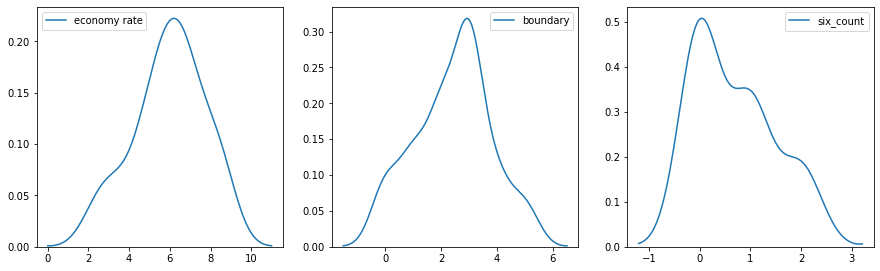

In [428]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.kdeplot(economy["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(economy["six_count"])

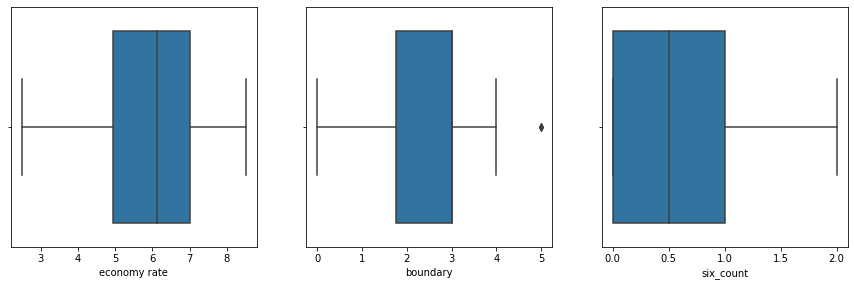

In [429]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.boxplot(economy["boundary"])
plt.subplot(3,3,3)
sns.boxplot(economy["six_count"])

In [430]:
economy.describe().iloc[:,4:].T

,count,mean,std,min,25%,50%,75%,max
economy rate,28.0,5.970357,1.713177,2.5,4.9375,6.125,7.0,8.5
boundary,28.0,2.428571,1.372442,0.0,1.7500,3.000,3.0,5.0
six_count,28.0,0.678571,0.772374,0.0,0.0000,0.500,1.0,2.0


Text(0, 0.5, 'Count')

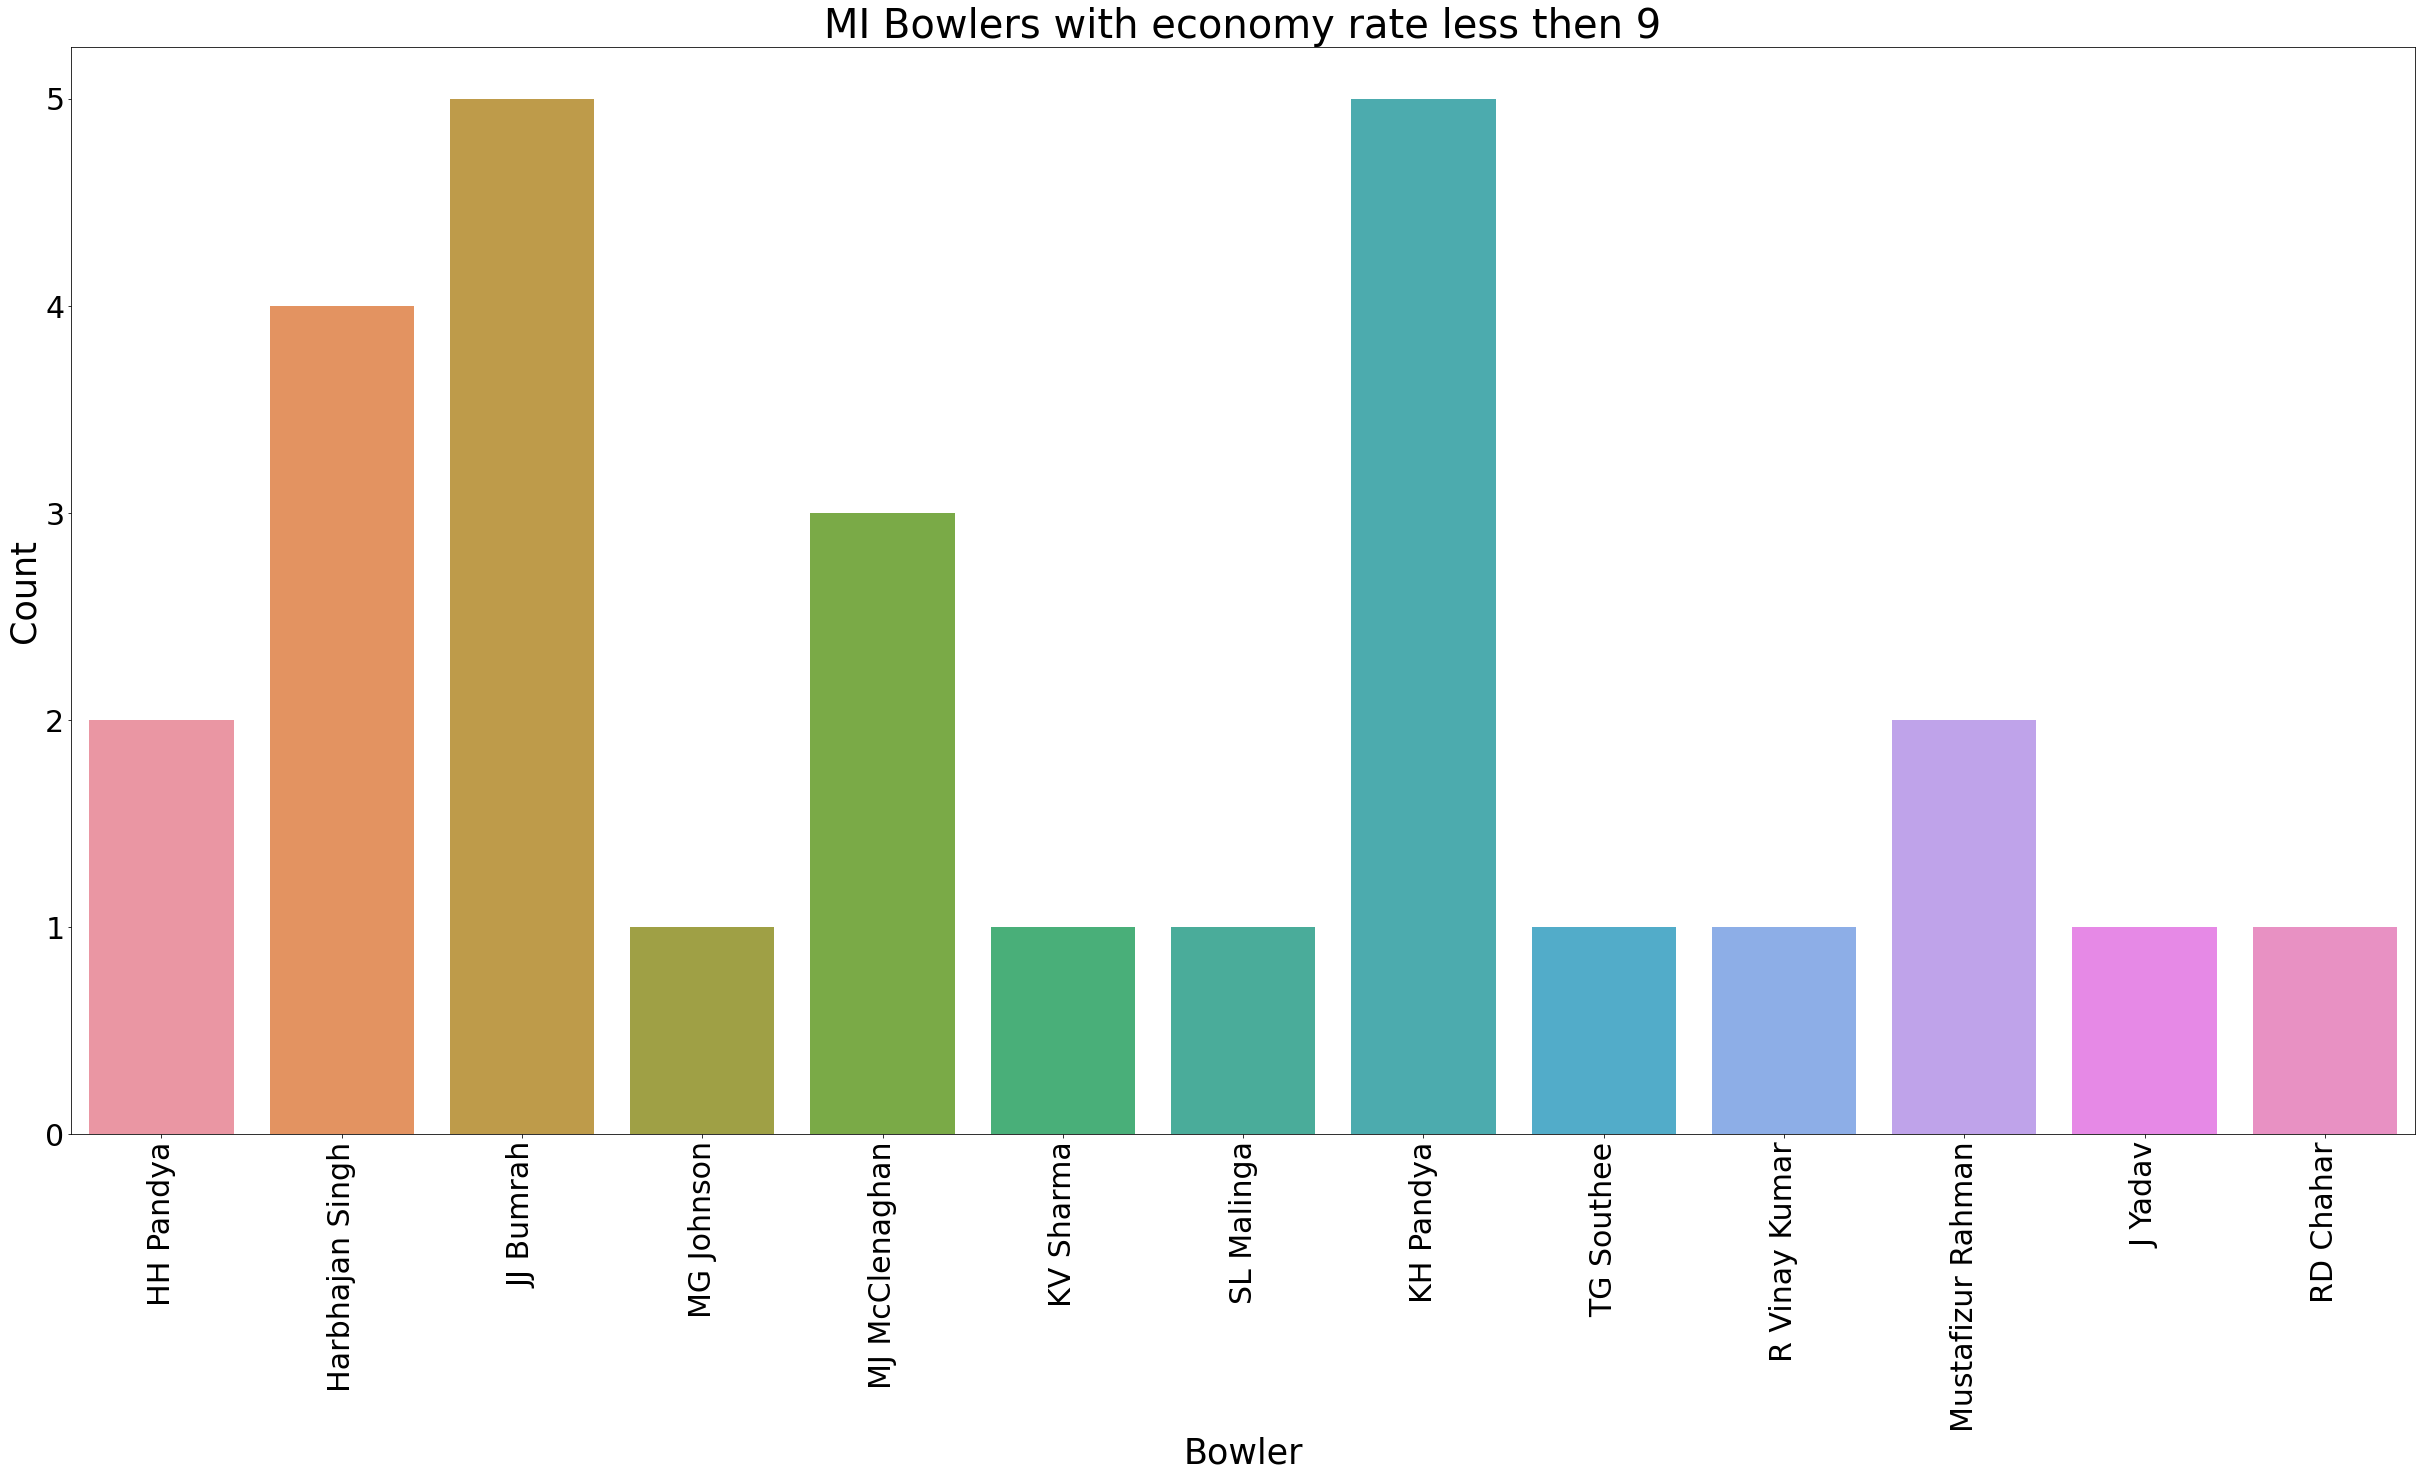

In [431]:
plt.figure(figsize = (42,20))
sns.countplot(economy["bowler"])
plt.title("MI Bowlers with economy rate less then 9",fontsize = 40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30,rotation = 90)
plt.xlabel('Bowler',fontsize=35)
plt.ylabel('Count',fontsize=35)

- Delhi Capitals

In [432]:
dc = DC_MI[DC_MI["bowling_team"]=="Delhi Capitals"]
dc = dc[(dc["season"]==2015)|(dc["season"]==2016)|(dc["season"]==2017)|(dc["season"]==2018)|(dc["season"]==2019)]
dc = dc[(dc["bye_runs"]==0)&(dc["legbye_runs"]==0)]
dc.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5513,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,...,5,0,0,0,0,0,5,5,NaN,NaN
5514,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,...,0,0,0,0,0,1,0,1,NaN,NaN
5515,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,...,0,0,0,0,0,1,0,1,NaN,NaN
5516,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,...,0,0,0,0,0,0,0,0,NaN,NaN
5517,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,Delhi Capitals,1,6,JC Buttler,...,0,0,0,0,0,0,0,0,NaN,NaN


In [433]:
economy = dc.groupby(["match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique', 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for DC Bowlers against MI :")

economy.tail(10)

Bowling stats for DC Bowlers against MI :


runs given  over  wickets taken
match_id bowler                                    
11139    K Paul             21     3              1
         K Rabada           23     4              2
         R Tewatia          12     2              1
         TA Boult           42     4              1
11325    A Mishra           18     3              1
         AR Patel           17     4              2
         CH Morris          39     3              0
         I Sharma           17     3              0
         K Paul             37     3              0
         K Rabada           38     4              2

In [434]:
economy["economy rate"] = round((economy['runs given']/economy["over"]),2)

print("Economy Rate of DC Bowlers while bowling against MI :")

economy.tail(10)

Economy Rate of DC Bowlers while bowling against MI :


runs given  over  wickets taken  economy rate
match_id bowler                                                  
11139    K Paul             21     3              1          7.00
         K Rabada           23     4              2          5.75
         R Tewatia          12     2              1          6.00
         TA Boult           42     4              1         10.50
11325    A Mishra           18     3              1          6.00
         AR Patel           17     4              2          4.25
         CH Morris          39     3              0         13.00
         I Sharma           17     3              0          5.67
         K Paul             37     3              0         12.33
         K Rabada           38     4              2          9.50

- Boundaries

In [435]:
dc_boundaries = dc[(dc["batsman_runs"]==4)|(dc["batsman_runs"]==6)]

dc_runs = pd.DataFrame(dc_boundaries.groupby(["match_id","bowler"])["batsman_runs"].count())

boundary = dc_runs.iloc[:,-1]

In [436]:
economy["boundary"] = boundary

economy.boundary.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  boundary
match_id bowler                                                            
11139    K Paul             21     3              1          7.00       3.0
         K Rabada           23     4              2          5.75       1.0
         R Tewatia          12     2              1          6.00       2.0
         TA Boult           42     4              1         10.50       7.0
11325    A Mishra           18     3              1          6.00       2.0
         AR Patel           17     4              2          4.25       0.0
         CH Morris          39     3              0         13.00       6.0
         I Sharma           17     3              0          5.67       1.0
         K Paul             37     3              0         12.33       4.0
         K Rabada           38     4              2          9.50       6.0

- Sixes

In [437]:
col = dc[["match_id","bowler","batsman_runs"]]

six = col["batsman_runs"]==6

six = six.replace({False:0 , True: 1})

six = list(six)

In [438]:
col["is_six"] = six

col

,match_id,bowler,batsman_runs,is_six
5513,24,K Rabada,0,0
5514,24,K Rabada,1,0
5515,24,K Rabada,1,0
5516,24,K Rabada,0,0
5517,24,K Rabada,0,0
...,...,...,...,...
172876,11325,K Rabada,6,1
172877,11325,K Rabada,0,0
172878,11325,K Rabada,1,0
172879,11325,K Rabada,4,0


In [439]:
col12 = pd.DataFrame(col.groupby(["match_id","bowler"]).agg({"is_six":"sum"}))

col12.tail(10)

is_six
match_id bowler           
11139    K Paul          0
         K Rabada        0
         R Tewatia       1
         TA Boult        1
11325    A Mishra        0
         AR Patel        0
         CH Morris       2
         I Sharma        0
         K Paul          2
         K Rabada        1

In [440]:
six = col12["is_six"]

In [441]:
economy["six_count"] = six

economy.six_count.fillna(0,inplace=True)

economy.tail(10)

runs given  over  wickets taken  economy rate  boundary  \
match_id bowler                                                               
11139    K Paul             21     3              1          7.00       3.0   
         K Rabada           23     4              2          5.75       1.0   
         R Tewatia          12     2              1          6.00       2.0   
         TA Boult           42     4              1         10.50       7.0   
11325    A Mishra           18     3              1          6.00       2.0   
         AR Patel           17     4              2          4.25       0.0   
         CH Morris          39     3              0         13.00       6.0   
         I Sharma           17     3              0          5.67       1.0   
         K Paul             37     3              0         12.33       4.0   
         K Rabada           38     4              2          9.50       6.0   

                    six_count  
match_id bowler                
11139    K Paul             0  
         K Rabada           0  
         R Tewatia          1  
         TA Boult           1  
11325    A Mishra           0  
         AR Patel           0  
         CH Morris          2  
         I Sharma           0  
         K Paul             2  
         K Rabada           1

In [442]:
economy = economy[(economy["over"]>1)&(economy["economy rate"]<9)&(economy["six_count"]<=2)&(economy["boundary"]<6)]

economy.reset_index(inplace = True)

print("DC Bowlers with economy rate less then 9: ")

economy

DC Bowlers with economy rate less then 9: 


,match_id,bowler,runs given,over,wickets taken,economy rate,boundary,six_count
0,24,A Mishra,17,4,2,4.25,2.0,0
1,24,CH Morris,32,4,2,8.00,4.0,2
2,24,K Rabada,23,4,2,5.75,2.0,2
3,24,PJ Cummins,19,4,2,4.75,1.0,0
4,44,K Rabada,29,4,1,7.25,3.0,1
5,44,Mohammed Shami,16,2,0,8.00,3.0,0
6,44,Z Khan,29,4,0,7.25,3.0,1
7,539,A Mishra,30,4,2,7.50,3.0,1
8,539,AD Mathews,15,2,2,7.50,3.0,1
9,539,DJ Muthuswami,7,2,1,3.50,0.0,0


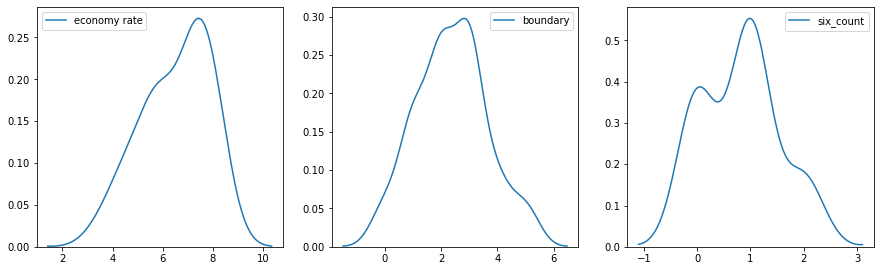

In [443]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.kdeplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.kdeplot(economy["boundary"])
plt.subplot(3,3,3)
sns.kdeplot(economy["six_count"])

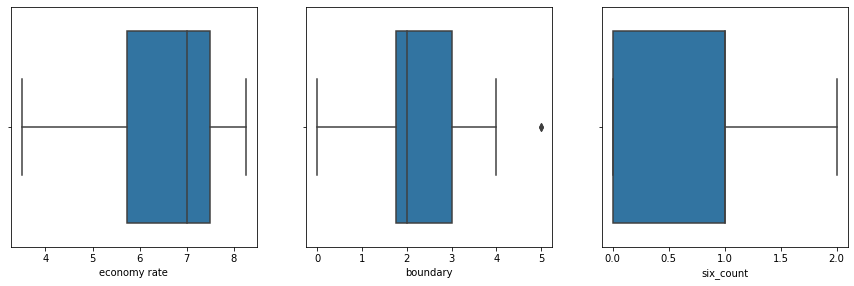

In [444]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.boxplot(economy["economy rate"])
plt.subplot(3,3,2)
sns.boxplot(economy["boundary"])
plt.subplot(3,3,3)
sns.boxplot(economy["six_count"])

In [445]:
economy.describe().iloc[:,4:].T

,count,mean,std,min,25%,50%,75%,max
economy rate,32.0,6.510625,1.325059,3.5,5.73,7.0,7.5,8.25
boundary,32.0,2.375000,1.263635,0.0,1.75,2.0,3.0,5.00
six_count,32.0,0.812500,0.692704,0.0,0.00,1.0,1.0,2.00


Text(0, 0.5, 'Count')

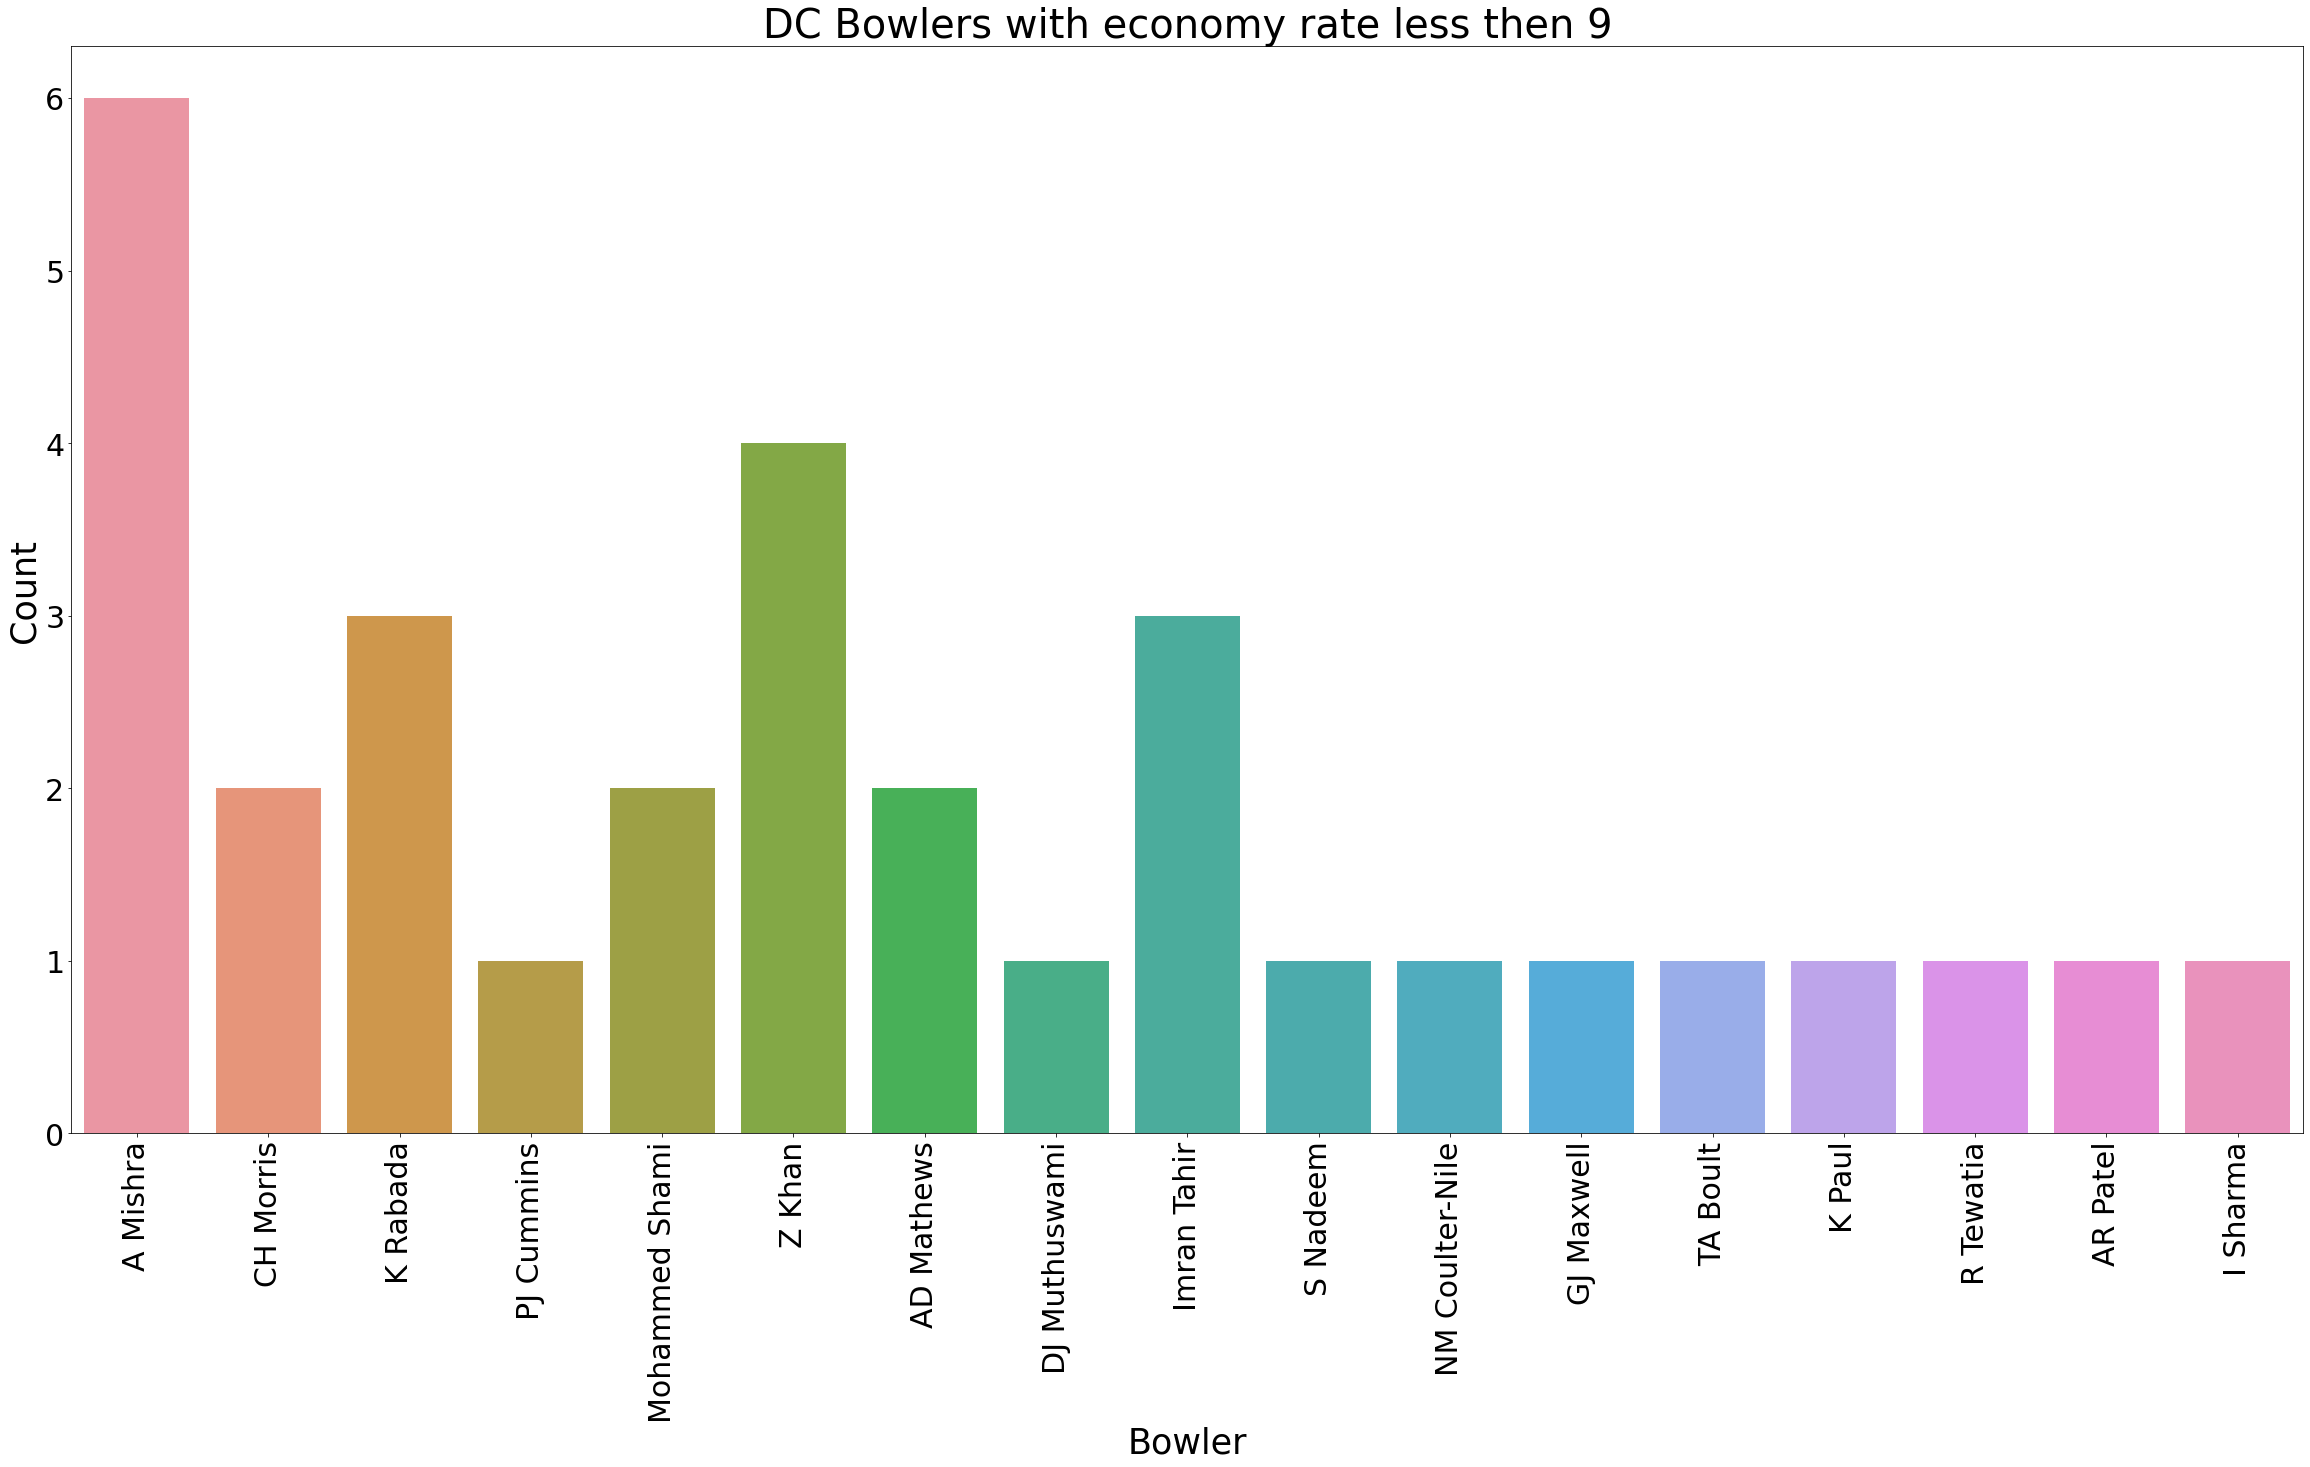

In [446]:
plt.figure(figsize = (40,20))
sns.countplot(economy["bowler"])
plt.title("DC Bowlers with economy rate less then 9",fontsize = 40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30,rotation = 90)
plt.xlabel('Bowler',fontsize=35)
plt.ylabel('Count',fontsize=35)

From all the above analysis we can expect 5-6 bowlers to have economy less then 9 and also satisfy all the conditions.

## Batsman to score more then 30 runs in the match

- Delhi Capitals

In [447]:
Delhi = DC_MI[DC_MI["batting_team"]=='Delhi Capitals']
Delhi = Delhi[Delhi["wide_runs"]==0]
Delhi = Delhi[(Delhi["season"]==2015)|(Delhi["season"]==2016)|(Delhi["season"]==2017)|(Delhi["season"]==2018)|(Delhi["season"]==2019)]

Delhi.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5639,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
5640,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,NaN,NaN
5641,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,...,0,0,0,0,0,1,0,1,NaN,NaN
5642,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,...,0,0,0,0,0,0,0,0,AP Tare,run out
5643,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,2,Delhi Capitals,...,0,0,0,0,0,4,0,4,NaN,NaN


In [448]:
batsman_runs =pd.DataFrame(Delhi.groupby(["match_id","batsman"])["batsman_runs"].sum())

batsman_runs.reset_index(inplace=True)

batsman_runs = batsman_runs[batsman_runs["batsman_runs"]>30]

print("Batsman of Delhi in recent year with score 30+ :")
batsman_runs

Batsman of Delhi in recent year with score 30+ :


,match_id,batsman,batsman_runs
1,24,CH Morris,52
3,24,K Rabada,44
21,539,JP Duminy,78
24,539,SS Iyer,83
33,556,Yuvraj Singh,57
34,593,JP Duminy,49
39,593,SV Samson,60
46,623,Q de Kock,40
53,7902,JJ Roy,92
54,7902,RR Pant,47


In [449]:
batsman_runs.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
batsman_runs,16.0,57.375,17.415989,35.0,44.0,50.5,70.5,92.0


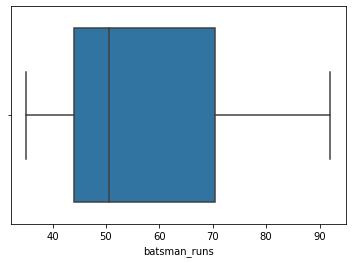

In [450]:
sns.boxplot(batsman_runs["batsman_runs"])

Text(0, 0.5, 'Count')

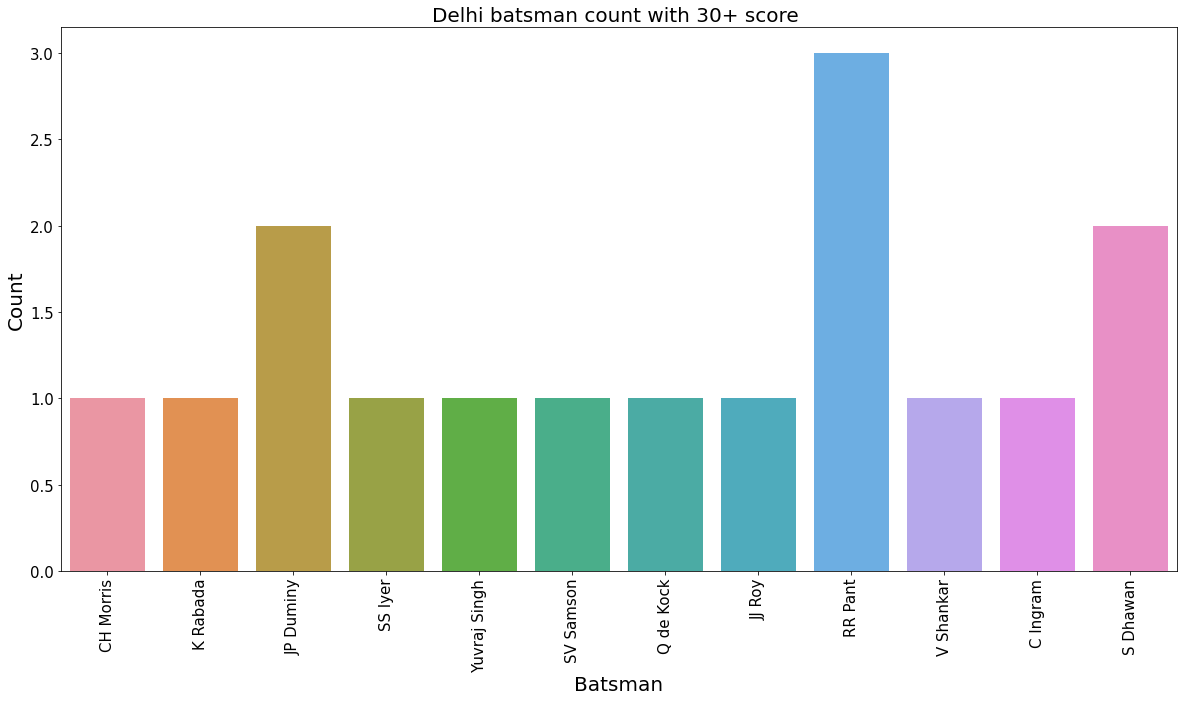

In [451]:
plt.figure(figsize = (20,10))
sns.countplot(batsman_runs["batsman"])
plt.title("Delhi batsman count with 30+ score ",fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation = 90)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

- Mumbai Indians

In [452]:
Mumbai = DC_MI[DC_MI["batting_team"]=='Mumbai Indians']
Mumbai = Mumbai[Mumbai["wide_runs"]==0]
Mumbai = Mumbai[(Mumbai["season"]==2015)|(Mumbai["season"]==2016)|(Mumbai["season"]==2017)|(Mumbai["season"]==2018)|(Mumbai["season"]==2019)]

Mumbai.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5512,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,1,0,0,0,1,1,NaN,NaN
5514,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,1,0,1,NaN,NaN
5515,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,1,0,1,NaN,NaN
5516,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN
5517,24,2017,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,0,Mumbai Indians,1,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN


In [453]:
batsman_runs =pd.DataFrame(Mumbai.groupby(["match_id","batsman"])["batsman_runs"].sum())

batsman_runs.reset_index(inplace=True)

batsman_runs = batsman_runs[batsman_runs["batsman_runs"]>30]

print("Batsman of Mumbai in recent year with score 30+ :")
batsman_runs

Batsman of Mumbai in recent year with score 30+ :


,match_id,batsman,batsman_runs
11,44,KA Pollard,63
12,44,LMP Simmons,66
25,556,AT Rayudu,49
31,556,RG Sharma,46
37,593,KH Pandya,36
39,593,RG Sharma,65
44,623,KH Pandya,86
45,623,MJ Guptill,48
46,623,RG Sharma,31
48,7902,AS Yadav,53


In [454]:
batsman_runs.describe().iloc[:,1:].T

,count,mean,std,min,25%,50%,75%,max
batsman_runs,20.0,47.3,14.433514,31.0,36.0,47.0,53.0,86.0


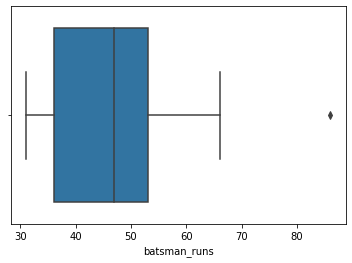

In [455]:
sns.boxplot(batsman_runs["batsman_runs"])

Text(0, 0.5, 'Count')

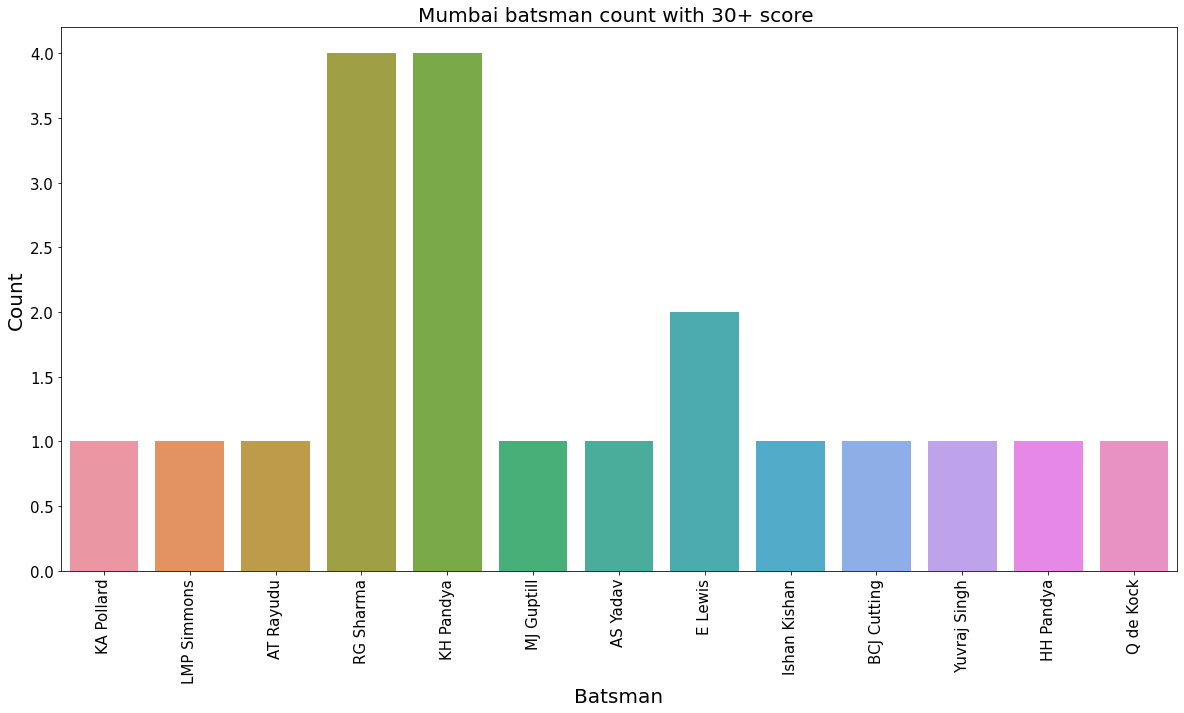

In [456]:
plt.figure(figsize = (20,10))
sns.countplot(batsman_runs["batsman"])
plt.title("Mumbai batsman count with 30+ score ",fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation = 90)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

From all the above analysis of both the teams we can predict that 3-4 batsman overall are expected to cross 30+ score.

## J Bumrah's economy rate in death

- Against DC

In [457]:
bumrah = DC_MI[(DC_MI["bowling_team"]=="Mumbai Indians") &(DC_MI["bowler"]=='JJ Bumrah')]
bumrah = bumrah[(bumrah["over"]>15)&(bumrah["over"]<=20)]
bumrah = bumrah[(bumrah["bye_runs"]==0) & (bumrah["legbye_runs"]==0)]
bumrah.iloc[:,6:].head()

,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
5739,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,17,1,K Rabada,CH Morris,JJ Bumrah,0,0,0,0,0,1,0,1,NaN,NaN
5740,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,17,2,CH Morris,K Rabada,JJ Bumrah,0,0,0,0,0,0,0,0,NaN,NaN
5741,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,17,3,CH Morris,K Rabada,JJ Bumrah,0,0,0,0,0,1,0,1,NaN,NaN
5742,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,17,4,K Rabada,CH Morris,JJ Bumrah,0,0,0,0,0,1,0,1,NaN,NaN
5743,0,Mumbai Indians,2,Delhi Capitals,Mumbai Indians,17,5,CH Morris,K Rabada,JJ Bumrah,0,0,0,0,0,1,0,1,NaN,NaN


In [458]:
bumrah.over.unique()

array([17, 19, 18, 20, 16], dtype=int64)

In [459]:
economy = bumrah.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for Bumrah against DC in death overs:")

economy

Bowling stats for Bumrah against DC in death overs:


runs given  over  wickets taken
season match_id bowler                                    
2013   408      JJ Bumrah          11     1              0
2014   508      JJ Bumrah          20     2              0
2015   539      JJ Bumrah          25     2              1
2016   593      JJ Bumrah          33     3              0
       623      JJ Bumrah           5     2              1
2017   24       JJ Bumrah           9     2              1
2018   7902     JJ Bumrah          16     2              0
       7948     JJ Bumrah           8     1              0
2019   11139    JJ Bumrah          30     2              1
       11325    JJ Bumrah          11     2              2

In [460]:
economy_rate = pd.DataFrame(economy['runs given']/economy["over"])

economy_rate.columns = ["economy rate"]

print("Economy Rate of Bumrah while bowling against DC in death overs :")

economy_rate

Economy Rate of Bumrah while bowling against DC in death overs :


economy rate
season match_id bowler                 
2013   408      JJ Bumrah          11.0
2014   508      JJ Bumrah          10.0
2015   539      JJ Bumrah          12.5
2016   593      JJ Bumrah          11.0
       623      JJ Bumrah           2.5
2017   24       JJ Bumrah           4.5
2018   7902     JJ Bumrah           8.0
       7948     JJ Bumrah           8.0
2019   11139    JJ Bumrah          15.0
       11325    JJ Bumrah           5.5

In [461]:
economy_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
economy rate,10.0,8.8,3.852849,2.5,6.125,9.0,11.0,15.0


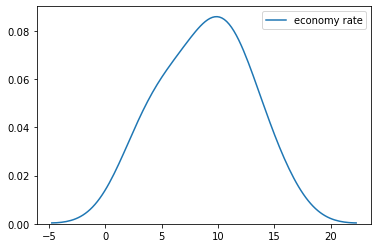

In [462]:
sns.kdeplot(economy_rate["economy rate"])

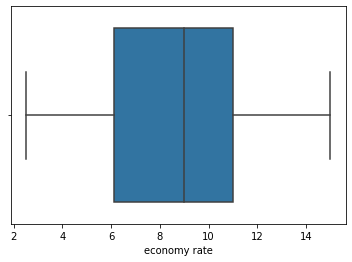

In [463]:
sns.boxplot(economy_rate["economy rate"])

In [464]:
print("Average economy rate of Bumrah while bowling against DC in death overs :",round(economy_rate["economy rate"].mean()))

Average economy rate of Bumrah while bowling against DC in death overs : 9


Text(0.5, 1.0, 'Economy rate')

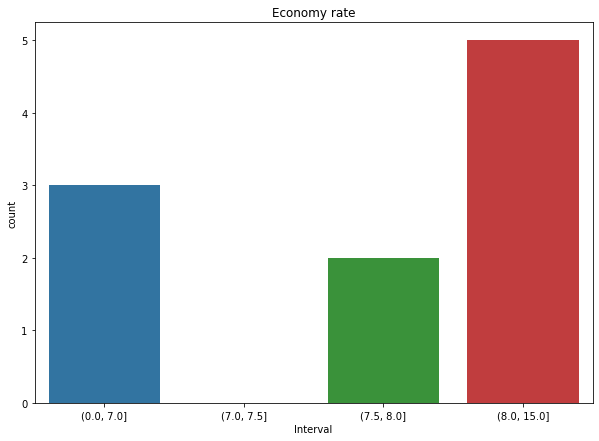

In [465]:
plt.figure(figsize=(10,7))
economy_rate["Interval"] = pd.cut(economy_rate["economy rate"],[0,7,7.5,8,15])
sns.countplot(economy_rate["Interval"])
plt.title("Economy rate")

- Overall

In [466]:
bumrah = matches[(matches["bowling_team"]=="Mumbai Indians")&(matches["bowler"]=='JJ Bumrah')]
bumrah = bumrah[(bumrah["over"]>15)&(bumrah["over"]<=20)]
bumrah = bumrah[(bumrah["bye_runs"]==0) & (bumrah["legbye_runs"]==0)]
bumrah.iloc[:,6:].head()

,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
472,0,Rising Pune Supergiant,2,Rising Pune Supergiant,Mumbai Indians,17,1,SPD Smith,MS Dhoni,JJ Bumrah,0,0,0,0,0,1,0,1,NaN,NaN
473,0,Rising Pune Supergiant,2,Rising Pune Supergiant,Mumbai Indians,17,2,MS Dhoni,SPD Smith,JJ Bumrah,0,0,0,0,0,1,0,1,NaN,NaN
474,0,Rising Pune Supergiant,2,Rising Pune Supergiant,Mumbai Indians,17,3,SPD Smith,MS Dhoni,JJ Bumrah,0,0,0,0,0,2,0,2,NaN,NaN
475,0,Rising Pune Supergiant,2,Rising Pune Supergiant,Mumbai Indians,17,4,SPD Smith,MS Dhoni,JJ Bumrah,0,0,0,0,0,0,0,0,NaN,NaN
476,0,Rising Pune Supergiant,2,Rising Pune Supergiant,Mumbai Indians,17,5,SPD Smith,MS Dhoni,JJ Bumrah,0,0,0,0,0,2,0,2,NaN,NaN


In [467]:
economy_overall = bumrah.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy_overall.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats of Bumrah in death overs:")

economy_overall

Bowling stats of Bumrah in death overs:


runs given  over  wickets taken
season match_id bowler                                    
2013   408      JJ Bumrah          11     1              0
2014   479      JJ Bumrah           9     1              0
       484      JJ Bumrah           9     1              1
       490      JJ Bumrah           9     1              0
       493      JJ Bumrah          15     2              0
...                               ...   ...            ...
2019   11338    JJ Bumrah          27     2              0
       11342    JJ Bumrah          19     2              0
       11347    JJ Bumrah          12     2              2
       11412    JJ Bumrah          17     2              0
       11415    JJ Bumrah           8     2              1

[69 rows x 3 columns]

In [468]:
economy_rate_overall = pd.DataFrame(economy_overall['runs given']/economy_overall["over"])

economy_rate_overall.columns = ["economy rate"]

print("Economy Rate of Bumrah in death overs :")

economy_rate_overall

Economy Rate of Bumrah in death overs :


economy rate
season match_id bowler                 
2013   408      JJ Bumrah          11.0
2014   479      JJ Bumrah           9.0
       484      JJ Bumrah           9.0
       490      JJ Bumrah           9.0
       493      JJ Bumrah           7.5
...                                 ...
2019   11338    JJ Bumrah          13.5
       11342    JJ Bumrah           9.5
       11347    JJ Bumrah           6.0
       11412    JJ Bumrah           8.5
       11415    JJ Bumrah           4.0

[69 rows x 1 columns]

In [469]:
economy_rate_overall.describe().T

,count,mean,std,min,25%,50%,75%,max
economy rate,69.0,8.731884,3.903787,2.0,6.0,8.5,10.5,24.0


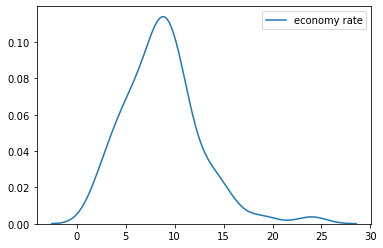

In [470]:
sns.kdeplot(economy_rate_overall["economy rate"])

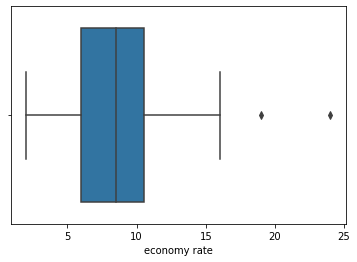

In [471]:
sns.boxplot(economy_rate_overall["economy rate"])

In [472]:
print("Average economy rate of Bumrah in death overs :",round(economy_rate_overall["economy rate"].mean()))

Average economy rate of Bumrah in death overs : 9


Text(0.5, 1.0, 'Economy rate Overall')

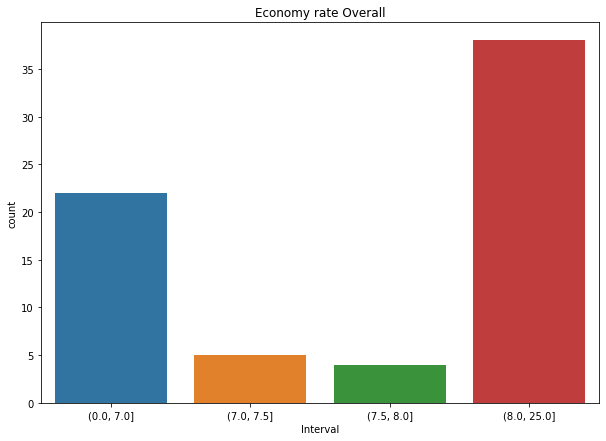

In [473]:
plt.figure(figsize=(10,7))
economy_rate_overall["Interval"] = pd.cut(economy_rate_overall["economy rate"],[0,7,7.5,8,25])
sns.countplot(economy_rate_overall["Interval"])
plt.title("Economy rate Overall")

From all the above analysis of economy rate of Bumrah against DC and also overall  we can predict that  Bumrah is expected to have economy rate of 8+ in death overs